In [4]:
library(ggpubr)
library(msigdbr)
library(stats)
library(sets)
library(biomaRt)
library(clusterProfiler)
library(data.table)
library(stringi)
library(pheatmap)
library(tidyr)
library(ggpubr)
library(biomaRt)

Loading required package: ggplot2

Registered S3 method overwritten by 'sets':
  method        from   
  print.element ggplot2


Attaching package: ‘sets’


The following object is masked from ‘package:msigdbr’:

    %>%


The following object is masked from ‘package:ggpubr’:

    %>%




Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE

clusterProfiler v3.14.3  For help: https://guangchuangyu.github.io/software/clusterProfiler

If you use clusterProfiler in published research, please cite:
Guangchuang Yu, Li-Gen Wang, Yanyan Han, Qing-Yu He. clusterProfiler: an R package for comparing biological themes among gene clusters. OMICS: A Journal of Integrative Biology. 2012, 16(5):284-287.


Attaching package: ‘data.table’


The following object is masked from ‘package:sets’:

    set



Attaching package: ‘tidyr’


The following object is masked from ‘package:sets’:

    %>%




In [5]:
human <- useMart("ensembl", dataset="hsapiens_gene_ensembl")

In [7]:
nrow(background_set)

[1] 22664

In [10]:
cons_score<- fread("/data/timonaj/cancer_as_wound/conservation/conservation_scores.txt", header =F)
colnames(cons_score) <- c("ID","score")

In [11]:
phast_genes <- gsub("\\..*","",cons_score$ID)
hgnc_id <- getLDS(attributes=c("ensembl_gene_id"), filters="ensembl_gene_id",
                  values=phast_genes,
                  mart=human,attributesL=c("hgnc_symbol","ensembl_gene_id"),
                  martL=human)

In [6]:
head(hgnc_id)

,Gene.stable.ID,HGNC.symbol,Gene.stable.ID.1
,<chr>,<chr>,<chr>
1,ENSG00000210049,MT-TF,ENSG00000210049
2,ENSG00000211459,MT-RNR1,ENSG00000211459
3,ENSG00000210077,MT-TV,ENSG00000210077
4,ENSG00000210082,MT-RNR2,ENSG00000210082
5,ENSG00000209082,MT-TL1,ENSG00000209082
6,ENSG00000198888,MT-ND1,ENSG00000198888


In [11]:
hgnc_ids <- character()
score <- numeric()

for(i in 1:nrow(cons_score)) {
    cur_id <- gsub("\\..*","",cons_score$ID[i])
    if(cur_id %in% hgnc_id$Gene.stable.ID) {
        gene_name <- hgnc_id[hgnc_id$Gene.stable.ID == cur_id,]$HGNC.symbol
        if(length(gene_name) > 1) {
            gene_name <- gene_name[1]
        }
        if(!is.na(gene_name) & gene_name != "") {
            hgnc_ids <- append(hgnc_ids, gene_name, length(hgnc_id))
            score <- append(score,cons_score$score[i], length(score))
        }
    }
}

In [12]:
length(hgnc_ids)
length(score)

[1] 38256

[1] 38256

In [15]:
phast_scores <- data.frame("geneName" = hgnc_ids,
                           "score" = as.numeric(score))

In [5]:
summary(recurrent_wrs_list[["downregulated"]])
summary(recurrent_wrs_list[["upregulated"]])

                       Length Class  Mode     
amexicanum_regen       1000   -none- character
celegans_stress        1000   -none- character
clupisFamiliaris_wound  198   -none- character
dmelanogaster_stress   1000   -none- character
dmelanogaster_wound     301   -none- character
drerio_regen           1000   -none- character
hsapiens_regen          436   -none- character
hsapiens_stress        1000   -none- character
hsapiens_wound          237   -none- character
mmusculus_stress        875   -none- character
rnorvegicus_wound      1000   -none- character
sscrofa_wound          1000   -none- character

                       Length Class  Mode     
amexicanum_regen       1000   -none- character
celegans_stress        1000   -none- character
clupisFamiliaris_wound   65   -none- character
dmelanogaster_stress   1000   -none- character
dmelanogaster_wound    5766   -none- character
drerio_regen           1000   -none- character
hsapiens_regen          426   -none- character
hsapiens_stress        1000   -none- character
hsapiens_wound          199   -none- character
mmusculus_stress        965   -none- character
rnorvegicus_wound      1000   -none- character
sscrofa_wound          1000   -none- character

In [31]:
total_scores <- numeric()
spec_exptype <- character()
for(i in 1:length(recurrent_wrs_list[["upregulated"]])) {
    current_list <- recurrent_wrs_list[["upregulated"]][[i]]
    scores <-phast_scores[phast_scores$geneName %in% current_list,]$score
    type <- names(recurrent_wrs_list[["upregulated"]])[i]
    spec_exptype <- append(spec_exptype, rep(type,length(scores)), length(spec_exptype))
    total_scores <- append(total_scores, scores, length(total_scores))
}

In [33]:
spec_exp_cons_scores <- data.frame("spec_exp" = spec_exptype,
                                   "conservation_scores" = as.numeric(total_scores))

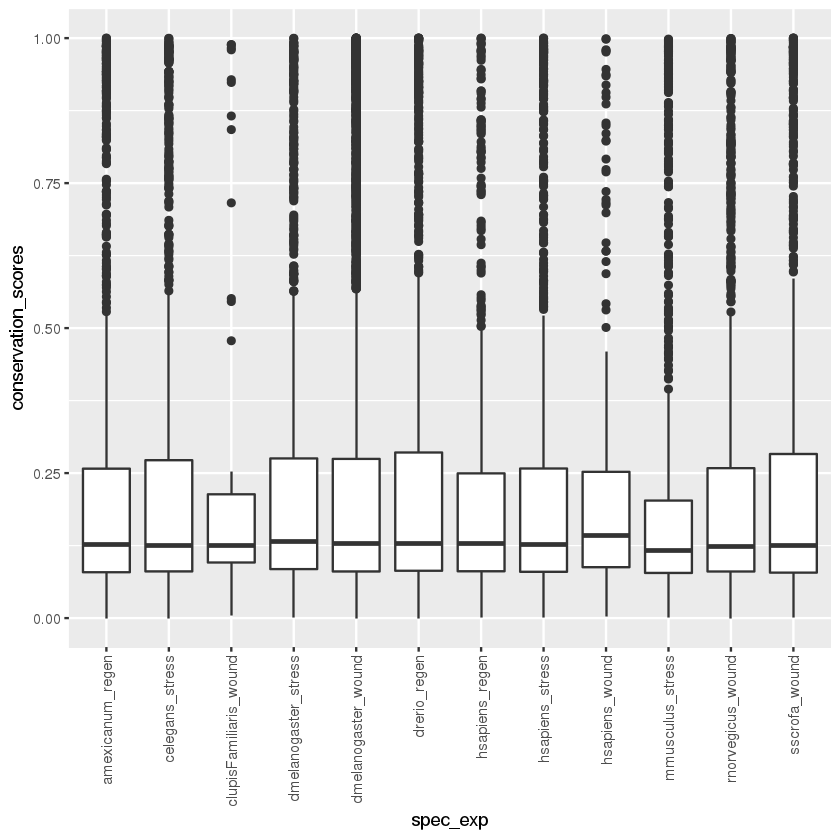

In [38]:
ggplot(spec_exp_cons_scores, aes(x=spec_exp, y=conservation_scores)) + 
  geom_boxplot() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [70]:
source("./enrichment_functions.R")

Bioconductor version 3.10 (BiocManager 1.30.10), ?BiocManager::install for help

Bioconductor version '3.10' is out-of-date; the current release version '3.13'
  is available with R version '4.1'; see https://bioconductor.org/install



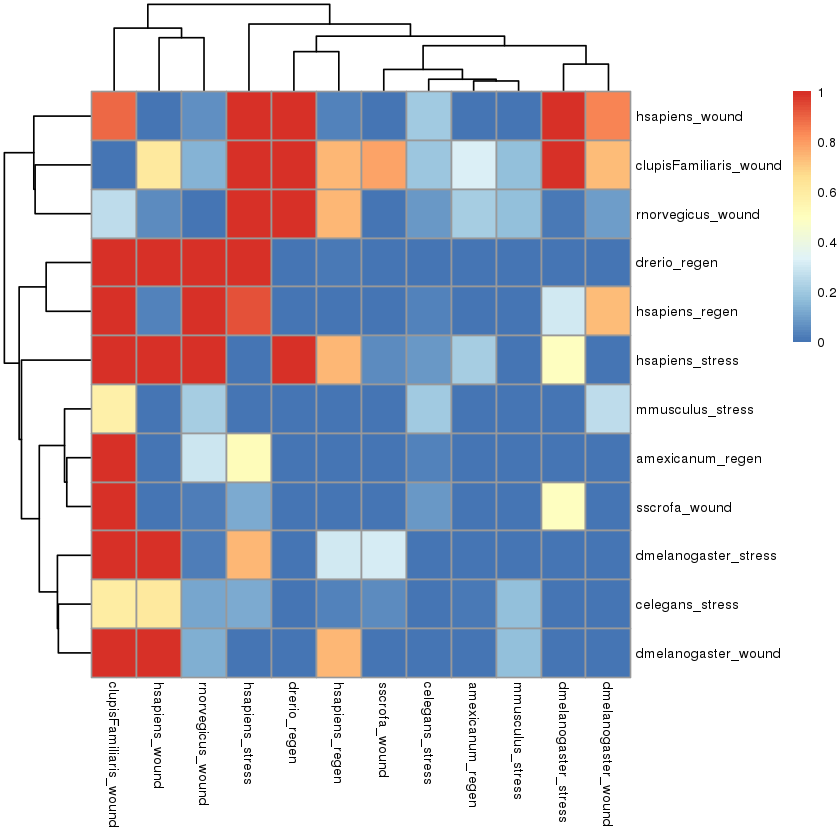

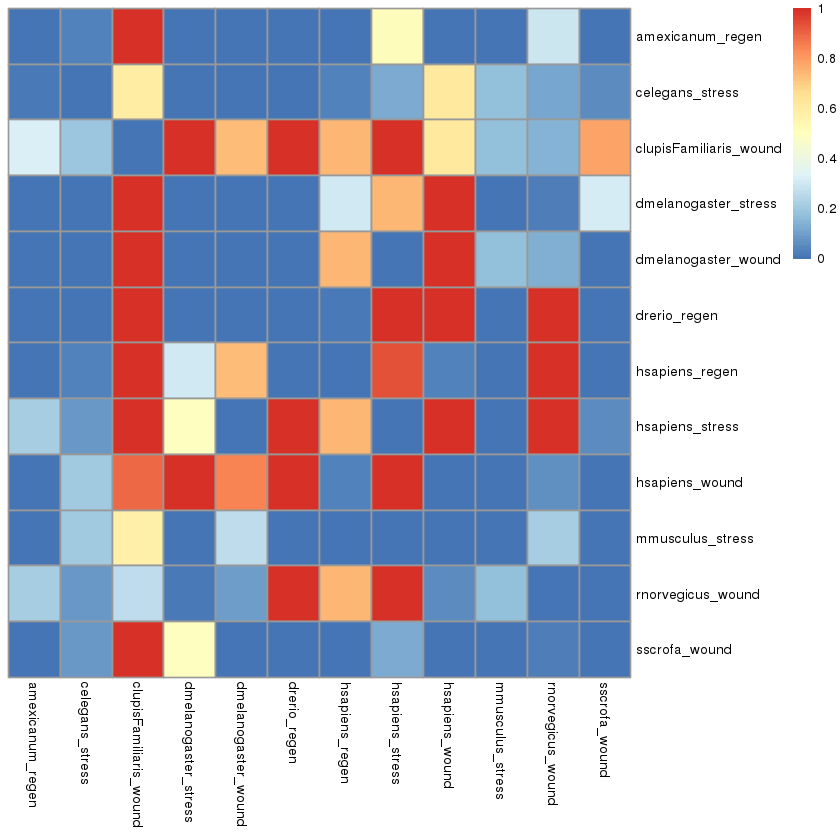

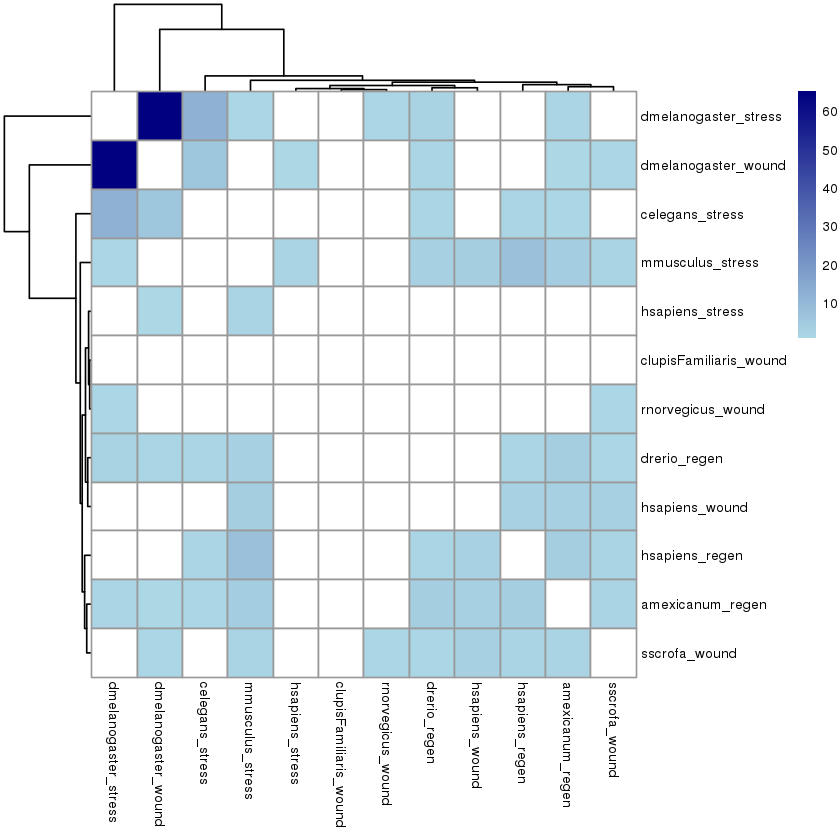

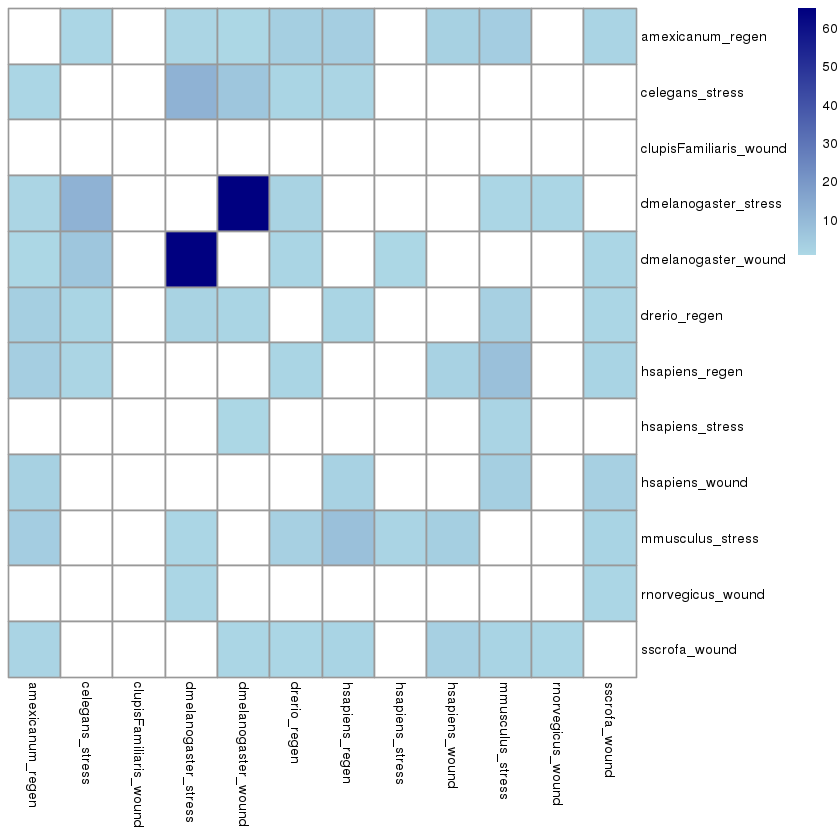

In [61]:
up_overlaps <- get_overlap_data(recurrent_wrs_list[["upregulated"]],
                                recurrent_wrs_list[["upregulated"]])

up_overlaps_new <- change_matrix(up_overlaps$matrix, up_overlaps$odds_matrix)

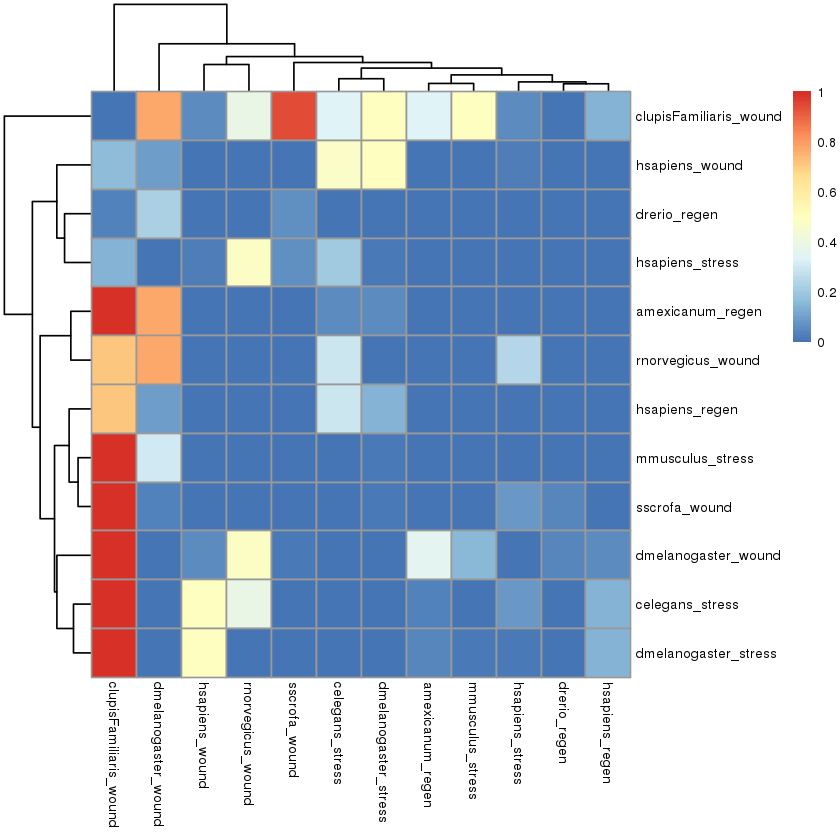

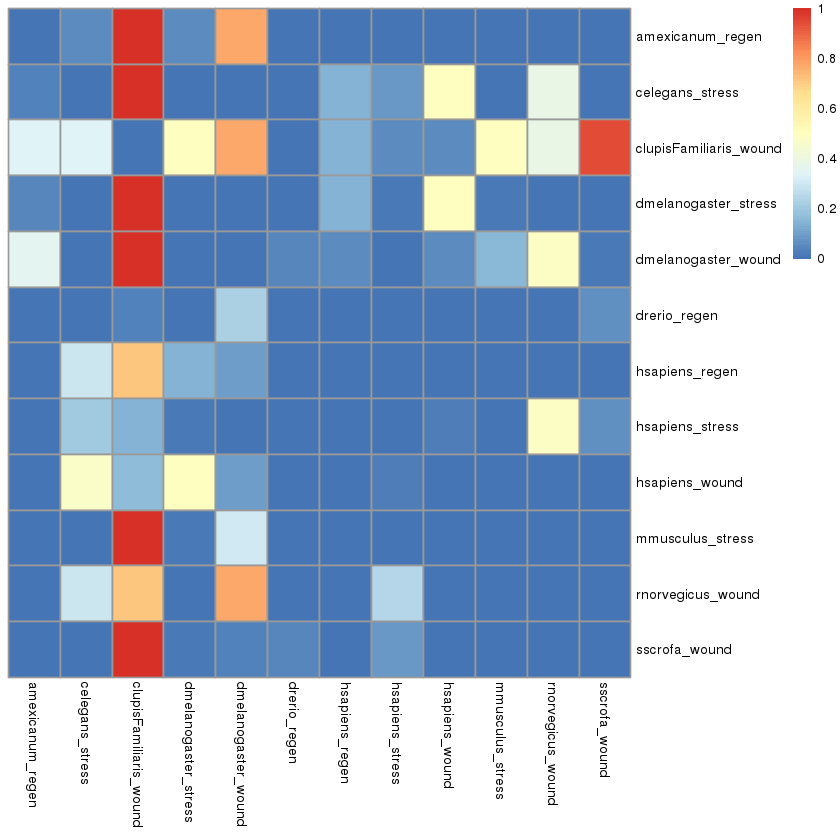

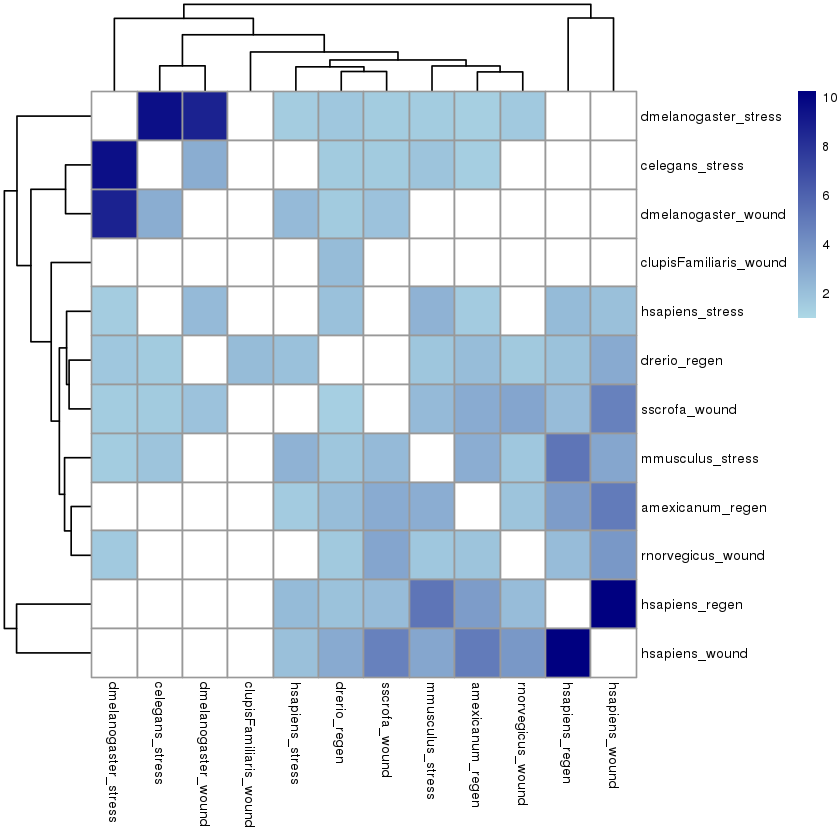

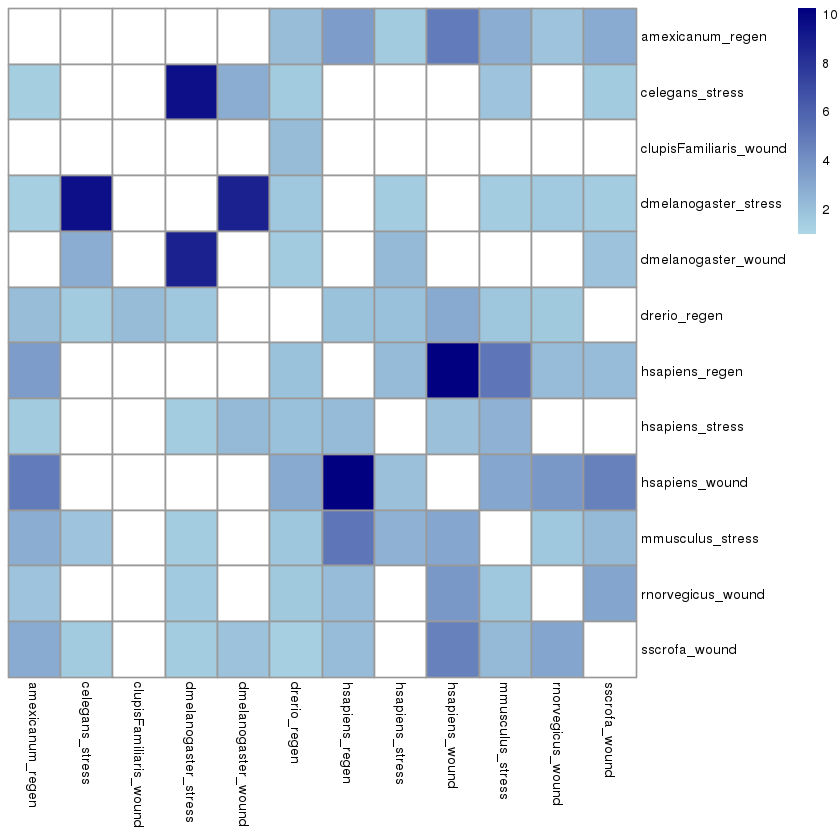

In [58]:
down_overlaps <- get_overlap_data(recurrent_wrs_list[["downregulated"]],
                                  recurrent_wrs_list[["downregulated"]])

down_overlaps_new <- change_matrix(down_overlaps$matrix, down_overlaps$odds_matrix)

In [11]:
head(recurrent_wrs_list[["upregulated"]][[1]])

[1] "4314"   "7168"   "4621"   "1153"   "255738" "4837"

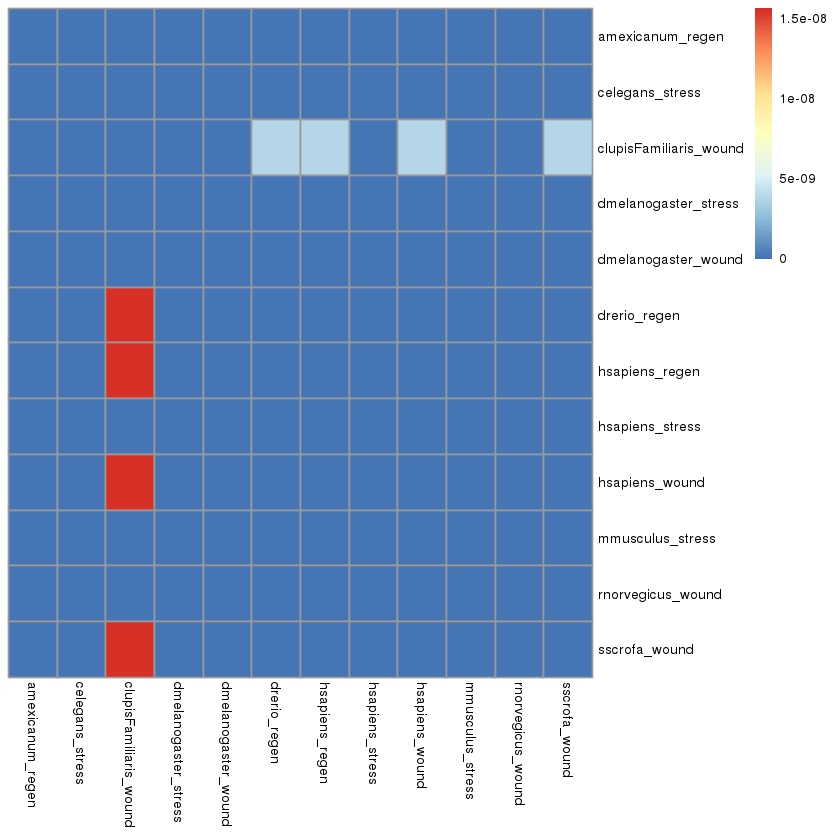

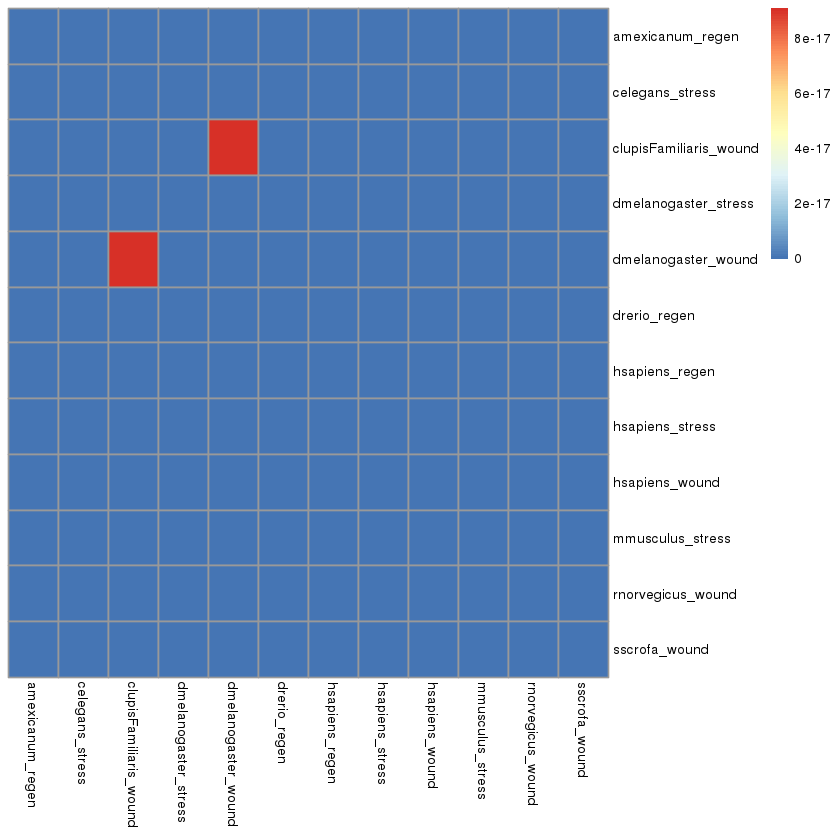

In [25]:
up_overlaps <- get_overlap_data(recurrent_wrs_list[["upregulated"]],background_set$gene)

down_overlaps <- get_overlap_data(recurrent_wrs_list[["downregulated"]],background_set$gene)

In [9]:
background_set$gene

[1] "A1BG"                   "A1BG-AS1"              
    [3] "A1CF"                   "A2M"                   
    [5] "A2M-AS1"                "A2ML1"                 
    [7] "A2MP1"                  "A3GALT2"               
    [9] "A4GALT"                 "A4GNT"                 
   [11] "AAAS"                   "AACS"                  
   [13] "AACSP1"                 "AADAC"                 
   [15] "AADACL2"                "AADACL3"               
   [17] "AADACL4"                "AADACP1"               
   [19] "AADAT"                  "AAGAB"                 
   [21] "AAK1"                   "AAMDC"                 
   [23] "AAMP"                   "AANAT"                 
   [25] "AAR2"                   "AARD"                  
   [27] "AARS1"                  "AARS2"                 
   [29] "AARSD1"                 "AASDH"                 
   [31] "AASDHPPT"               "AASS"                  
   [33] "AATBC"                  "AATF"                  
   [35] "AATK"                   "ABAT"                  
   [37] "ABCA1"                  "ABCA10"                
   [39] "ABCA11P"                "ABCA12"                
   [41] "ABCA13"                 "ABCA17P"               
   [43] "ABCA2"                  "ABCA3"                 
   [45] "ABCA4"                  "ABCA5"                 
   [47] "ABCA6"                  "ABCA7"                 
   [49] "ABCA8"                  "ABCA9"                 
   [51] "ABCB1"                  "ABCB10"                
   [53] "ABCB11"                 "ABCB4"                 
   [55] "ABCB5"                  "ABCB6"                 
   [57] "ABCB7"                  "ABCB8"                 
   [59] "ABCB9"                  "ABCC1"                 
   [61] "ABCC10"                 "ABCC11"                
   [63] "ABCC12"                 "ABCC13"                
   [65] "ABCC2"                  "ABCC3"                 
   [67] "ABCC4"                  "ABCC5"                 
   [69] "ABCC6"                  "ABCC6P1"               
   [71] "ABCC8"                  "ABCC9"                 
   [73] "ABCD1"                  "ABCD1P2"               
   [75] "ABCD2"                  "ABCD3"                 
   [77] "ABCD4"                  "ABCE1"                 
   [79] "ABCF1"                  "ABCF2"                 
   [81] "ABCF2-H2BE1"            "ABCF3"                 
   [83] "ABCG1"                  "ABCG2"                 
   [85] "ABCG4"                  "ABCG5"                 
   [87] "ABCG8"                  "ABHD1"                 
   [89] "ABHD10"                 "ABHD11"                
   [91] "ABHD12"                 "ABHD12B"               
   [93] "ABHD13"                 "ABHD14A"               
   [95] "ABHD14B"                "ABHD15"                
   [97] "ABHD16A"                "ABHD16B"               
   [99] "ABHD17A"                "ABHD17B"               
  [101] "ABHD17C"                "ABHD18"                
  [103] "ABHD2"                  "ABHD3"                 
  [105] "ABHD4"                  "ABHD5"                 
  [107] "ABHD6"                  "ABHD8"                 
  [109] "ABI1"                   "ABI2"                  
  [111] "ABI3"                   "ABI3BP"                
  [113] "ABITRAM"                "ABL1"                  
  [115] "ABL2"                   "ABLIM1"                
  [117] "ABLIM2"                 "ABLIM3"                
  [119] "ABO"                    "ABR"                   
  [121] "ABRA"                   "ABRACL"                
  [123] "ABRAXAS1"               "ABRAXAS2"              
  [125] "ABT1"                   "ABTB1"                 
  [127] "ABTB2"                  "ACAA1"                 
  [129] "ACAA2"                  "ACACA"                 
  [131] "ACACB"                  "ACAD10"                
  [133] "ACAD11"                 "ACAD8"                 
  [135] "ACAD9"                  "ACADL"                 
  [137] "ACADM"                  "ACADS"                 
  

In [31]:
a <- matrix(c(7124,624,
         7532,intersect(recurrent_wrs_list[["upregulated"]][1],recurrent_wrs_list[["upregulated"]][2])),nrow=2,ncol=2,byrow=T)
a
fisher.test(a,alternative="g")
b <- matrix(c(7124,7532,
         624,5916),nrow=2,ncol=2,byrow=T)
b
fisher.test(b,alternative="g")

7124,624
7532,5916



	Fisher's Exact Test for Count Data

data:  a
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 8.317958      Inf
sample estimates:
odds ratio 
  8.967278 


7124,7532
624,5916



	Fisher's Exact Test for Count Data

data:  b
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 8.317958      Inf
sample estimates:
odds ratio 
  8.967278 


In [32]:
21196-14072

[1] 7124

In [43]:
length(setdiff(background,compare))

[1] 21664

In [66]:
fore <- recurrent_wrs_list[["upregulated"]][[3]]
compare <- recurrent_wrs_list[["upregulated"]][[2]]
background <- background_set$gene
non_compare <- setdiff(background, compare)
non_foreground_genes <- setdiff(background, fore)
length(intersect(compare,fore))
length(intersect(compare,non_foreground_genes))
length(intersect(non_compare,fore))
length(intersect(non_compare,non_foreground_genes))

b <- matrix(c(length(intersect(compare,fore)),length(intersect(compare,non_foreground_genes)),
         length(intersect(non_compare,fore)),length(intersect(non_compare,non_foreground_genes))),nrow=2,ncol=2,byrow=T)
b
fisher.test(b,alternative="g")

[1] 6

[1] 994

[1] 59

[1] 21605

6,994
59,21605



	Fisher's Exact Test for Count Data

data:  b
p-value = 0.06649
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 0.9263846       Inf
sample estimates:
odds ratio 
  2.210391 


In [54]:
fore <- recurrent_wrs_list[["upregulated"]][[2]]
compare <- recurrent_wrs_list[["upregulated"]][[2]]
background <- background_set$gene
non_compare <- setdiff(background, compare)
non_foreground_genes <- setdiff(background, fore)
length(intersect(compare,fore))
length(intersect(compare,non_foreground_genes))
length(intersect(non_compare,fore))
length(intersect(non_compare,non_foreground_genes))

b <- matrix(c(length(intersect(compare,fore)),length(intersect(compare,non_foreground_genes)),
         length(intersect(non_compare,fore)),length(intersect(non_compare,non_foreground_genes))),nrow=2,ncol=2,byrow=T)
b
fisher.test(b,alternative="g")

[1] 1000

[1] 0

[1] 0

[1] 21664

1000,0
0,21664



	Fisher's Exact Test for Count Data

data:  b
p-value < 2.2e-16
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 8623.158      Inf
sample estimates:
odds ratio 
       Inf 


In [40]:
length(fore)
length(compare)

[1] 1000

[1] 1000

In [65]:
poop<- fisher.test(b,alternative="g")

In [66]:
poop$estimate

odds ratio 
       Inf